In [1]:
%run fungsi_save.ipynb

In [2]:
#read training data
train_data = pd.read_csv('rev3_data_baru_norm_training.csv', sep=',',header=None)
train_data = train_data.values

#read selected feature
post = pd.read_csv('data_featureclass_pos.csv', sep=',',header=None)
post = np.int_(post)
total_features = np.size(train_data, axis=1)-3
print(total_features)

#split output training data for multiclass model
output_train_data = train_data[:,total_features+1]
output_train_data = np.int_(output_train_data)
train_data = train_data[:,:total_features]
output_train_data

29


array([2, 1, 0, ..., 1, 2, 2])

In [3]:
np.size(train_data,axis=0)

1390

In [4]:
post #selected feature with label 1

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [5]:
a = [] #index non-selected feature
for i in range(len(post)):
    if post[i,0] == 0:
        a.append(i)
a

[0, 3, 4, 6, 9, 12, 16, 20, 27, 28]

In [6]:
train_data = np.delete(train_data, a ,axis=1) #remove the non-selected feature
print("Number of training samples is", len(train_data))
print(np.size(train_data,axis=1))
print(train_data)

Number of training samples is 1390
19
[[0.1880663  0.80561347 0.21574129 ... 0.29014588 0.1609526  0.71176292]
 [0.21701657 0.88720096 0.42076579 ... 0.61292544 0.22502134 0.71985131]
 [0.07823204 0.90193096 0.45890352 ... 0.61879185 0.11605917 0.73730247]
 ...
 [0.29436464 0.82699077 0.62428926 ... 0.63501407 0.28902858 0.58111237]
 [0.20640884 0.95507519 0.63652066 ... 0.59083277 0.15008542 0.58083608]
 [0.25281768 0.46894224 0.05926986 ... 0.10275283 0.14183405 0.11345727]]


In [7]:
#data validasi
validasi_data = pd.read_csv('rev3_data_baru_norm_testing.csv', sep=',',header=None)
validasi_data = validasi_data.values
output_validasi_data = validasi_data[:,total_features+1] #output aja untuk multi
output_validasi_data = np.int_(output_validasi_data)
validasi_data = validasi_data[:,0:total_features] #fitur aja tanpa output dan fiturnya lengkap
validasi_data = np.delete(validasi_data, a ,axis=1) #data fitur yang udah terseleksi
validasi_data
#save_data1(test_data)

array([[0.40801887, 0.80433874, 0.54960908, ..., 0.58273251, 0.3198881 ,
        0.75043118],
       [0.28571429, 0.95830213, 0.59469715, ..., 0.74493176, 0.19263616,
        0.80296297],
       [0.45552561, 0.0862087 , 0.16137348, ..., 0.10532876, 0.43856627,
        0.10534321],
       ...,
       [0.43227763, 0.53723024, 0.17163028, ..., 0.09762785, 0.27089558,
        0.07846987],
       [0.43665768, 0.56633515, 0.26558575, ..., 0.3474814 , 0.44610273,
        0.65158423],
       [0.45822102, 0.67597931, 0.40662746, ..., 0.44184126, 0.42528261,
        0.44448341]])

In [8]:
validasi_data.shape

(347, 19)

In [9]:
n_inputs = np.size(validasi_data,1)
n_hidden = 20
n_classes = 3
n_inputs

19

In [10]:
#one hot encoding for multiclass classification
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(output_train_data)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)


[2 1 0 ... 1 2 2]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [11]:
labels = np.array(onehot_encoded)#output_train_data
labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [12]:
train_data = train_data/np.amax(train_data, axis=0) 

In [13]:
train_data

array([[0.1880663 , 0.80561347, 0.21574129, ..., 0.29014588, 0.1609526 ,
        0.71176292],
       [0.21701657, 0.88720096, 0.42076579, ..., 0.61292544, 0.22502134,
        0.71985131],
       [0.07823204, 0.90193096, 0.45890352, ..., 0.61879185, 0.11605917,
        0.73730247],
       ...,
       [0.29436464, 0.82699077, 0.62428926, ..., 0.63501407, 0.28902858,
        0.58111237],
       [0.20640884, 0.95507519, 0.63652066, ..., 0.59083277, 0.15008542,
        0.58083608],
       [0.25281768, 0.46894224, 0.05926986, ..., 0.10275283, 0.14183405,
        0.11345727]])

In [14]:
#copy paste from other github for backpropagation algorithm

error1 = []
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
        
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=1
                ):  
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = 1
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural 
        network with optional bias nodes"""
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes + bias_node))
        
        
        
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        global error1
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
                                    
            
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_vector_network
        error1.append(output_errors)
        self.output_errors = output_errors
        # update the weights:
        tmp = output_errors * output_vector_network * (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]     # ???? last element cut off, ???
        else:
            x = np.dot(tmp, input_vector.T)
        self.weights_in_hidden += self.learning_rate * x
    def error(self):
        return self.output_errors
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [1]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[1]]) )
            
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
        output_vector2 = np.argmax(output_vector, axis=0)
        W1 = self.weights_in_hidden
        W2 = self.weights_hidden_out
        save(W1,W2)
        return output_vector2

In [15]:
simple_network = NeuralNetwork(no_of_in_nodes=n_inputs, 
                               no_of_out_nodes=3, 
                               no_of_hidden_nodes=n_hidden,
                               learning_rate=0.001,
                               bias=1)
output_predict_train = []
error = []
for z in range(1000):
    for i in range(len(train_data)):
        simple_network.train(train_data[i], labels[i])
    #print(simple_network.error())
    error.append(error)

In [16]:
for i in range(len(train_data)):
    #print("data ke-",i)
    #print(output_train_data[i])
    #print(simple_network.run(train_data[i]))
    output_predict_train.append(simple_network.run(train_data[i]))

In [17]:
output_predict_train = np.array(output_predict_train)

In [18]:
validasi_data = validasi_data/np.amax(validasi_data, axis=0) 

In [19]:
output_validasi_data

array([1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0,

In [20]:
output_predict_validasi = []
for i in range(len(validasi_data)):
    #print('data ke-',i)
    #print(output_validasi_data[i])
    #print(simple_network.run(validasi_data[i]))
    output_predict_validasi.append(simple_network.run(validasi_data[i]))
output_predict_validasi

[array([1], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([2], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([2], dtype=int64),
 array([1], 

In [21]:
output_predict_validasi = np.array(output_predict_validasi)
output_validasi_data1 = np.array(output_validasi_data)
output_validasi_data1

array([1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0,

In [22]:
np.savetxt('output_predict_validasi.csv', output_predict_validasi, delimiter=",")
np.savetxt('output_asli_validasi.csv', output_validasi_data1, delimiter=",")

Normalized confusion matrix
[[0.89 0.05 0.05]
 [0.22 0.75 0.04]
 [0.12 0.07 0.81]]
Normalized confusion matrix
[[0.79 0.16 0.06]
 [0.06 0.93 0.01]
 [0.13 0.13 0.74]]


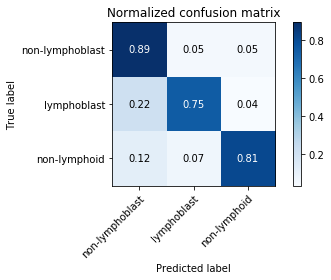

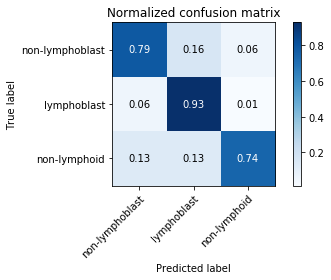

In [23]:
class_names = np.array(['non-lymphoblast',"lymphoblast","non-lymphoid"])
np.set_printoptions(precision=2)
cm_t = plot_confusion_matrix(output_train_data, output_predict_train, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
cm_v = plot_confusion_matrix(output_validasi_data, output_predict_validasi, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [24]:
cm_train = confusion_matrix(output_train_data, output_predict_train)
cm_validasi = confusion_matrix(output_validasi_data, output_predict_validasi)

In [25]:
print("Presisi data training limfoblas : ", precision(1,cm_train))
print("Recall data training limfoblas (sensitivitas) : ", recall(1,cm_train))
print("Presisi rerata data training : ", precision_macro_average(cm_train))
print("Presisi rerata data training : ", recall_macro_average(cm_train))
print("Akurasi data training : ", accuracy(cm_train))
print("F1 Score data training : ", f1_score(precision_macro_average(cm_train),recall_macro_average(cm_train)))

Presisi data training limfoblas :  0.7875816993464052
Recall data training limfoblas (sensitivitas) :  0.7461300309597523
Presisi rerata data training :  0.8298659164846861
Presisi rerata data training :  0.8155541760742056
Akurasi data training :  0.8294964028776979
F1 Score data training :  0.8226478050577348


In [26]:
print("Presisi data validasi limfoblas : ", precision(1,cm_validasi))
print("Recall data validasi limfoblas", recall(1,cm_validasi))
print("Presisi rerata data validasi : ", precision_macro_average(cm_validasi))
print("Presisi rerata data validasi : ", recall_macro_average(cm_validasi))
print("Akurasi data validasi : ", accuracy(cm_validasi))
print("F1 Score data validasi : ", f1_score(precision_macro_average(cm_validasi),recall_macro_average(cm_validasi)))

Presisi data validasi limfoblas :  0.6226415094339622
Recall data validasi limfoblas 0.9295774647887324
Presisi rerata data validasi :  0.7940600978336828
Presisi rerata data validasi :  0.8187474588692106
Akurasi data validasi :  0.7982708933717579
F1 Score data validasi :  0.8062148327477492


In [27]:
error1 = np.array(error1)
error1

array([[[-0.64],
        [-0.41],
        [ 0.56]],

       [[-0.64],
        [ 0.58],
        [-0.44]],

       [[ 0.36],
        [-0.42],
        [-0.44]],

       ...,

       [[-0.05],
        [ 0.17],
        [-0.14]],

       [[-0.28],
        [-0.46],
        [ 0.88]],

       [[-0.  ],
        [-0.01],
        [ 0.01]]])

In [28]:
epoch =np.array([i for i in range(1000)])

In [29]:
error1.shape

(1390000, 3, 1)

In [30]:
cost = 0
cost_er = []
for i in range(1000):
    cost = 0
    for z in range(len(train_data)):
        cost = cost+abs(error1[z+(len(train_data)*i)])
    cost_er.append(cost)
        

In [31]:
cost_er = np.array(cost_er)
cost_er.shape

(1000, 3, 1)

In [32]:
cost_er

array([[[517.17],
        [438.66],
        [477.2 ]],

       [[504.66],
        [407.2 ],
        [466.06]],

       [[497.2 ],
        [389.64],
        [459.61]],

       ...,

       [[222.19],
        [177.89],
        [176.06]],

       [[222.16],
        [177.86],
        [176.05]],

       [[222.12],
        [177.83],
        [176.04]]])

In [33]:
cost_error = []
for i in range(1000):
    cost_error.append((np.mean(cost_er[i]/1000,axis=0)))

In [34]:
cost_error = np.array(cost_error)
cost_error

array([[0.48],
       [0.46],
       [0.45],
       [0.44],
       [0.44],
       [0.44],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.43],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.42],
       [0.41],
       [0.41],
       [0.41],
       [0.41],
       [0.41],
       [0.41],
       [0.41],
       [0.41],
       [0.4 ],
       [0.4 ],
       [0.4 ],
       [0.4 ],
       [0.4 ],
       [0.4 ],
       [0.4 ],
       [0.4 ],
       [0.39],
       [0.39],
       [0.39],
       [0.39],
       [0.39],
       [0.39],
       [0.39],
       [0.38],
       [0.38],
       [0.

In [35]:
epoch.shape

(1000,)

In [36]:
cm_t.figure.savefig('rev3_train4.png')
cm_v.figure.savefig('rev3_validasi4.png')
save_pos_step1('perfo_bp.csv',(accuracy(cm_train),accuracy(cm_validasi),cost_error))

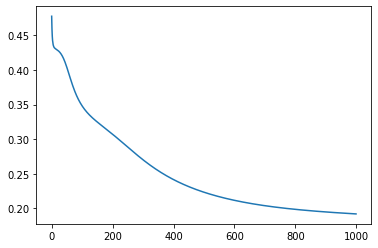

In [37]:
plt.plot(epoch,cost_error)
plt.show()